LEVEL 3 - TASK 3:PRICE RANGE V/S ONLINE DELIVERY AND TABLE BOOKING

--3:1 Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

--3:2 Determine if higher-priced restaurants are more likely to offer these services.

3:1 ANALYZE IF THERE IS A RELATIONSHIP BETWEEN THE PRICE RANGE AND THE AVAILABILITY OF ONLINE DELIVERY AND TABLE BOOKING.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import data
dataset= pd.read_csv("dataset.csv")

In [3]:
#check data
dataset.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
#check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#check dataset column names
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#convert categorical column to numeric for better visualization
dataset['Has Table booking']= dataset['Has Table booking'].map({'Yes':1, 'No':0})
dataset['Has Online delivery']= dataset['Has Online delivery'].map({'Yes':1, 'No':0})

#set figure size
plt.figure(figsize=(12,5))

#plot online delivery vs price range
plt.subplot(1,2,1)
sns.barplot(x='Price range', y='Has Table booking', data=dataset,color="orange", estimator=lambda x: sum(x)/len(x))
plt.title('Online Delivery Availability by Price Range')
plt.ylabel('Proportion of Restaurants with Online Delivery')
plt.tight_layout()
plt.show()

#plot table booking vs price range
plt.subplot(1,2,1)
sns.barplot(x='Price range', y='Has Table booking', data=dataset, color="orange", estimator=lambda x: sum(x)/len(x))
plt.title('Table Booking Availability by Price Range')
plt.ylabel('Proportion of Restaurants with Table Booking')

plt.tight_layout()
plt.show()

3:2 DETERMINE IF HIGHER-PRICED RESTAURANTS ARE MORE LIKELY TO OFFER THESE SERVICES.

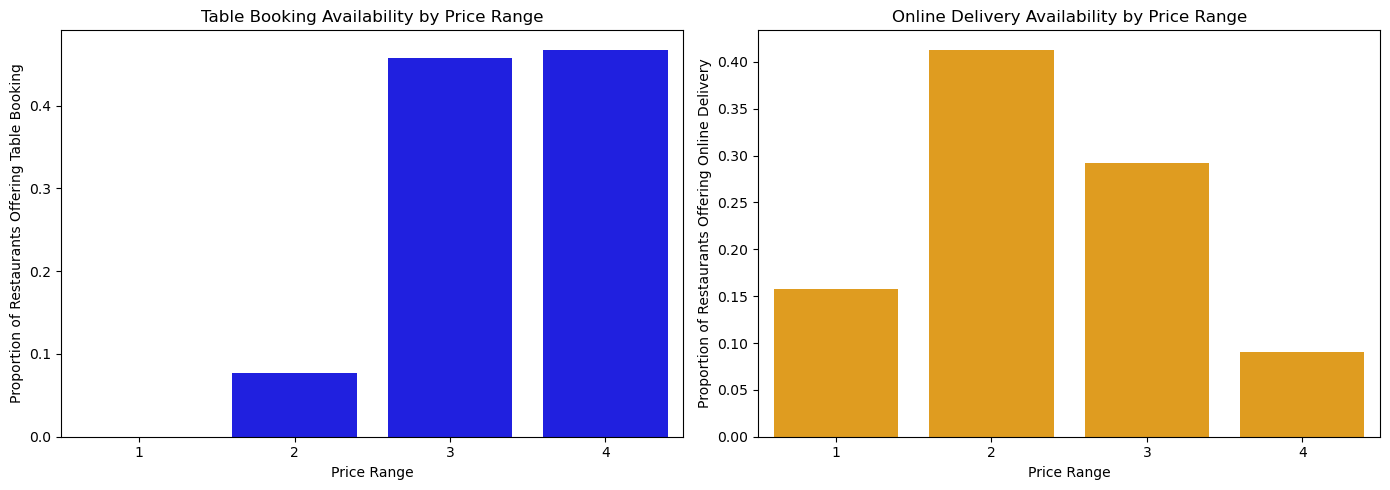

,Has Table booking,Has Online delivery
Price range,,
1,0.000225,0.157741
2,0.076775,0.413106
3,0.457386,0.291903
4,0.467577,0.090444


In [6]:
# Convert 'Has Table booking' and 'Has Online delivery' to binary (Yes=1, No=0)
dataset["Has Table booking"] = dataset["Has Table booking"].map({"Yes": 1, "No": 0})
dataset["Has Online delivery"] = dataset["Has Online delivery"].map({"Yes": 1, "No": 0})

# Group by price range and calculate the mean availability of services
price_grouped = dataset.groupby("Price range")[["Has Table booking", "Has Online delivery"]].mean()

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Table Booking
sns.barplot(x=price_grouped.index, y=price_grouped["Has Table booking"], ax=axes[0], color="Blue", legend=False)
axes[0].set_title("Table Booking Availability by Price Range")
axes[0].set_xlabel("Price Range")
axes[0].set_ylabel("Proportion of Restaurants Offering Table Booking")

# Online Delivery
sns.barplot(x=price_grouped.index, y=price_grouped["Has Online delivery"], ax=axes[1], color="Orange",legend=False)
axes[1].set_title("Online Delivery Availability by Price Range")
axes[1].set_xlabel("Price Range")
axes[1].set_ylabel("Proportion of Restaurants Offering Online Delivery")

plt.tight_layout()
plt.show()

# Display the calculated data
price_grouped